In [1]:
import os
import cv2
import torch
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO('runs/detect/train6/weights/best.pt')

In [3]:
image_folder = 'Dataset/test/images'

all_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('jpg', 'jpeg', 'png'))]

In [4]:
colors ={
        'Cardboard': (109, 67, 38),
        'Glass': (28, 255, 0),
        'Metal': (128, 128, 128),
        'Paper':  (0, 255, 255) ,
        'Plastic': (230, 216, 173)
    }

In [8]:
def show_images_with_inferences(images):
    plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(images):
        # Leer la imagen
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Realizar inferencia
        results = model(img)
        
        # Dibujar las cajas de predicción en la imagen
        for result in results:
            boxes = result.boxes.xyxy  # cajas xyxy
            confs = result.boxes.conf  # confidencias
            clses = result.boxes.cls   # clases
            
            for box, conf, cls in zip(boxes, confs, clses):
                if conf > 0.5:
                    x1, y1, x2, y2 = map(int, box)
                    label = model.names[int(cls)]
                    text = f"{label} {conf:.2f}"
                    color = colors.get(label, (0, 0, 0))
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
                    cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        
        # Mostrar la imagen
        plt.subplot(5, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


0: 384x640 3 Papers, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 1 Metal, 2 Papers, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Metals, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 3.0ms
Speed: 1.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Glass, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 2 Metals, 1 Paper, 3.0ms
Speed: 1.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Metals, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per i

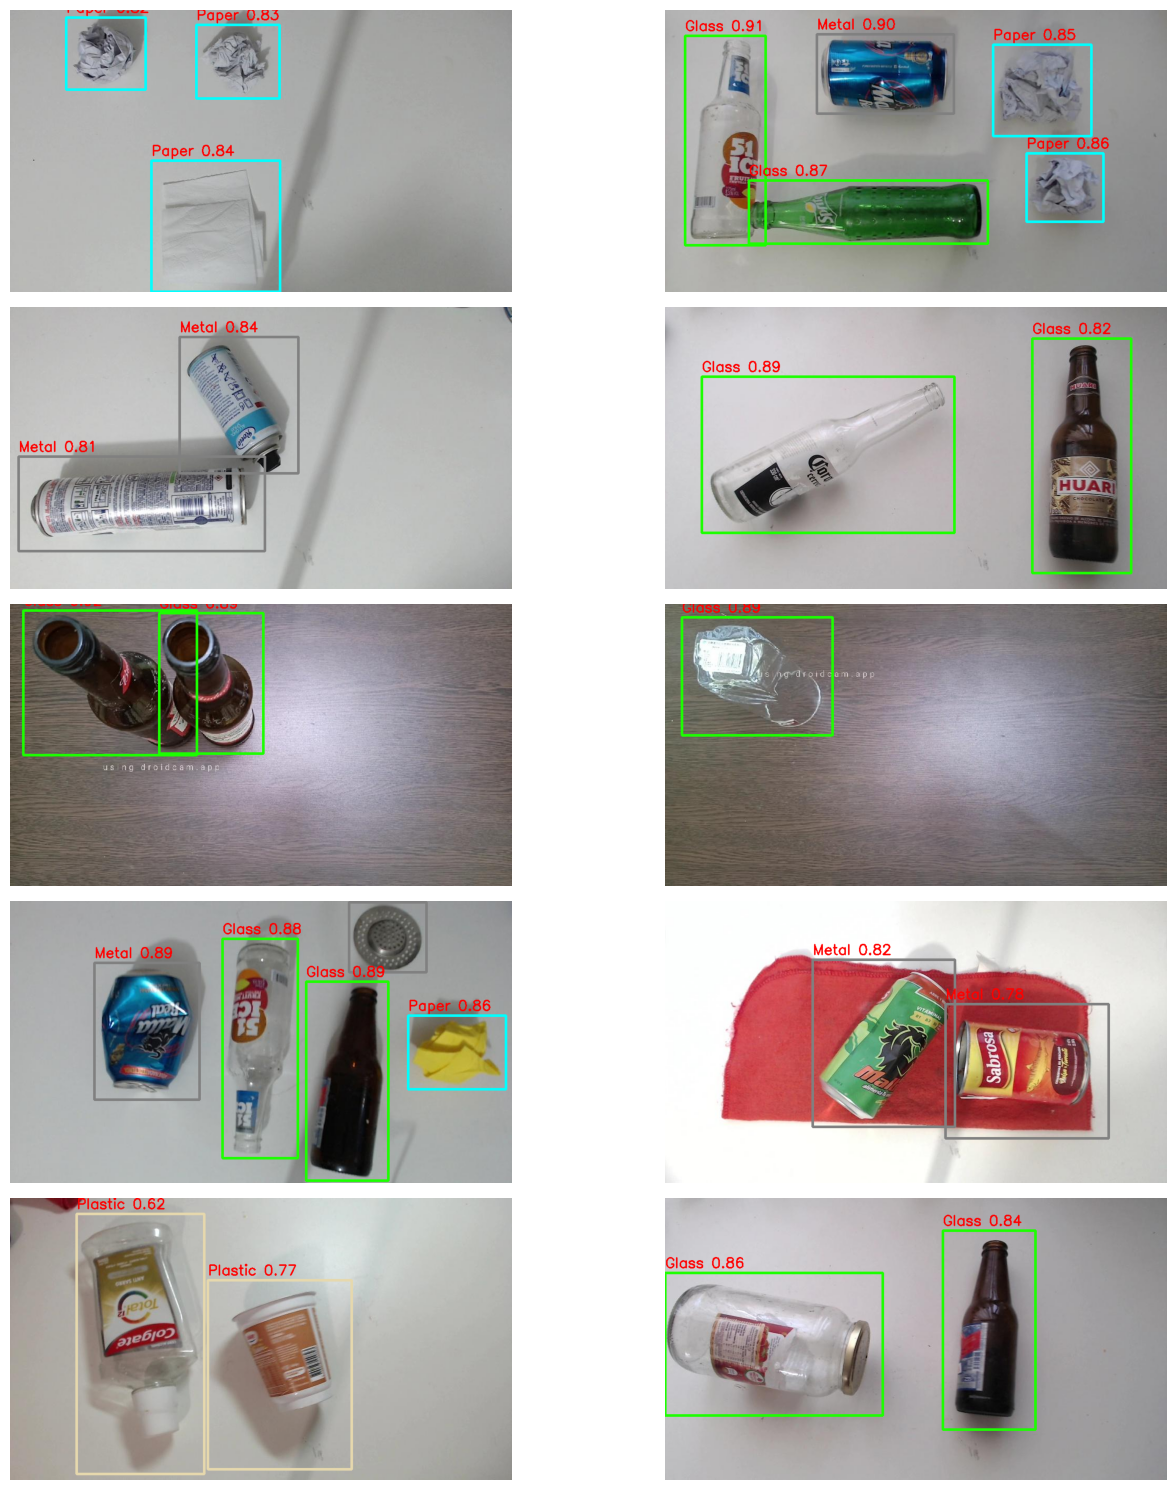

In [10]:
random_images = random.sample(all_images, 10)
show_images_with_inferences(random_images)


0: 384x640 1 Glass, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Cardboard, 1 Paper, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Metals, 3.0ms
Speed: 2.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Metals, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Plastic, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Metals, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Papers, 1 Plastic, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape 

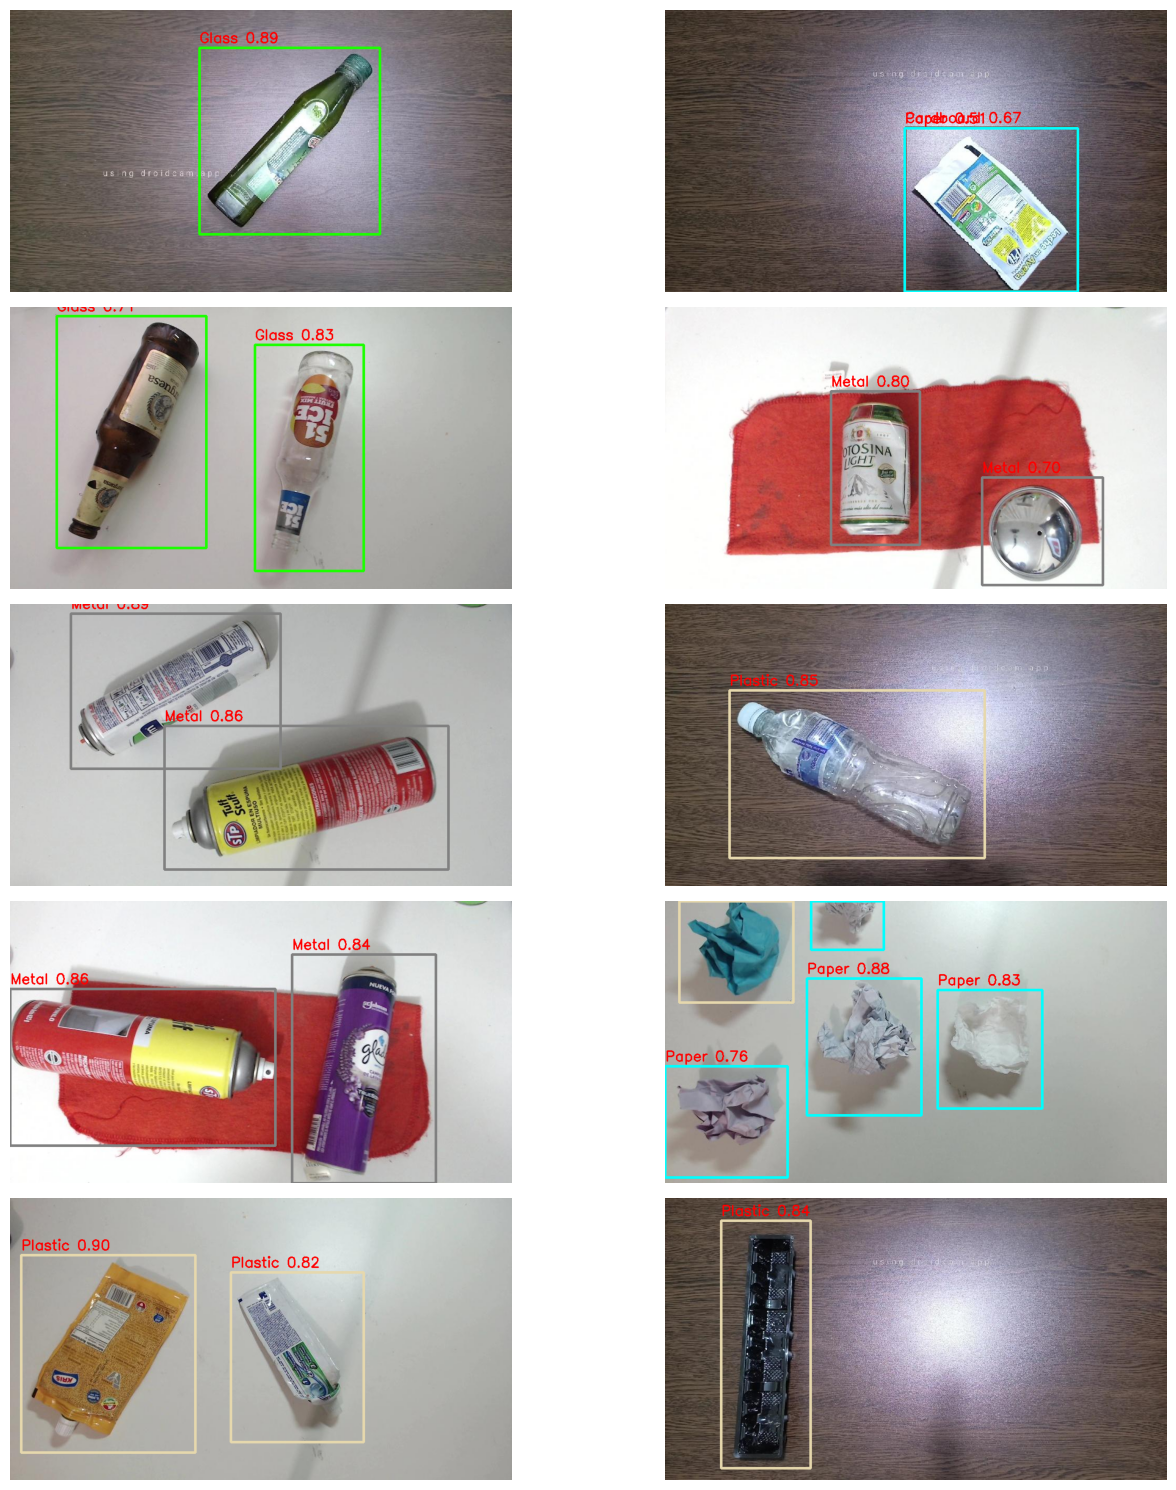

In [12]:
random_images = random.sample(all_images, 10)
show_images_with_inferences(random_images)


0: 384x640 1 Glass, 3 Metals, 3 Papers, 1 Plastic, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Papers, 3.0ms
Speed: 1.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Plastics, 3.0ms
Speed: 1.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 1 Plastic, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Cardboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Glass, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Glasss, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Glasss, 3 Metals, 1 Paper, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inferenc

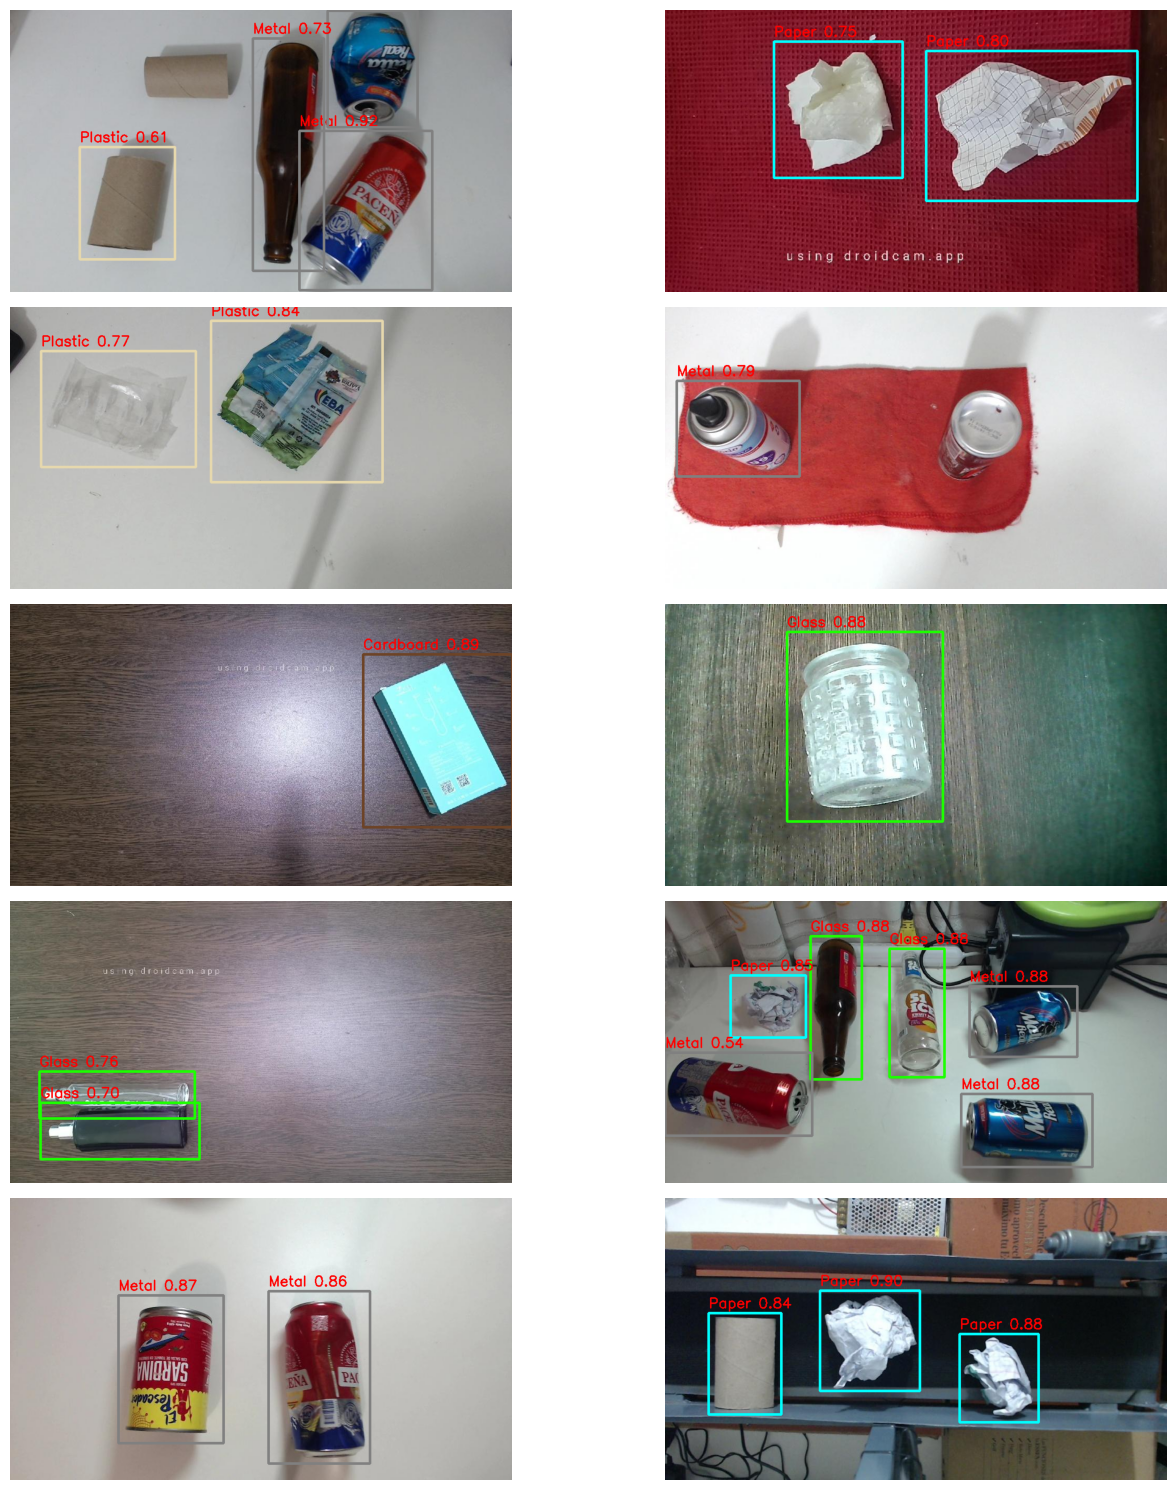

In [13]:
random_images = random.sample(all_images, 10)
show_images_with_inferences(random_images)